# 3.1 외국인 출입국 통계 데이터 구하기

In [7]:
# 크롤링을 이용하여 한국관광공사에서 목젹별 외래객 데이터 가져오기
# 실습에서는 추출된 엑셀 파일을 사용한다.

# 3.2 데이터 불러오기 및 전처리

## 3.2.1 불러올 데이터의 형태 파악
- 국적, 관광, 상용, 공용, 유학/연수, 기타, 합계 속성만 사용
- 마지막 로우 4개는 불필요한 데이터로 삭제

##  3.2.2 파이썬에서 엑섹 데이터 불러오기

In [3]:
import pandas as pd

# 2010년 01월 파일 한 개 불러오기
kto_201001 = pd.read_excel('files/kto_201001.xlsx',
                 header = 1,
                 skipfooter = 4,
                 usecols = 'A:G' )

In [4]:
kto_201001.head(3)

,국적,관광,상용,공용,유학/연수,기타,계
0,아시아주,329131,18238,421,4339,80916,433045
1,일본,202825,1750,89,549,3971,209184
2,대만,35788,41,17,37,516,36399


In [5]:
kto_201001.tail(3)

,국적,관광,상용,공용,유학/연수,기타,계
64,국적미상,10,3,0,0,0,13
65,교포소계,0,0,0,0,22537,22537
66,교포,0,0,0,0,22537,22537


## 3.2.3 데이터 전처리

In [8]:
# 사용하는 데이터에 대한 탐색 과정이 필요
kto_201001.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   국적      67 non-null     object
 1   관광      67 non-null     int64 
 2   상용      67 non-null     int64 
 3   공용      67 non-null     int64 
 4   유학/연수   67 non-null     int64 
 5   기타      67 non-null     int64 
 6   계       67 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 3.8+ KB


In [10]:
kto_201001.describe()

,관광,상용,공용,유학/연수,기타,계
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,11964.716418,683.462687,81.731343,152.776119,4115.910448,16998.597015
std,47055.349998,2639.234303,370.034666,622.299519,11560.294887,59189.624627
min,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,254.000000,23.500000,0.000000,6.000000,161.500000,605.000000
50%,554.000000,47.000000,2.000000,17.000000,449.000000,1350.000000
75%,3638.000000,301.000000,14.000000,54.500000,1608.000000,7582.000000
max,329131.000000,18238.000000,2159.000000,4339.000000,80916.000000,433045.000000


* 목적별 평균을 살펴보면 관광, 기타, 상용, 유학/연수, 공용 순으로 높다

In [11]:
# 각 칼럼에서 0인 부분에 대한 확인을 위해 필터링

In [15]:
condition = (kto_201001['관광'] == 0) | (kto_201001['상용'] == 0) \
| (kto_201001['공용'] == 0) | (kto_201001['유학/연수'] == 0) \
| (kto_201001['기타'] == 0)

kto_201001[condition]

,국적,관광,상용,공용,유학/연수,기타,계
3,홍콩,13874,55,0,21,595,14545
4,마카오,554,0,0,0,0,554
6,말레이시아,3292,61,0,49,1157,4559
16,캄보디아,102,22,0,25,131,280
19,이란,69,309,0,3,217,598
20,이스라엘,792,11,0,0,53,856
24,GCC,223,134,0,18,55,430
38,스위스,512,30,0,7,77,626
40,덴마크,378,28,0,5,94,505
41,노르웨이,517,274,0,6,149,946


### 데이터프레임에 기준년월 추가

In [24]:
kto_201001['기준년월'] = '2010-01'
kto_201001

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
0,아시아주,329131,18238,421,4339,80916,433045,2010-01
1,일본,202825,1750,89,549,3971,209184,2010-01
2,대만,35788,41,17,37,516,36399,2010-01
3,홍콩,13874,55,0,21,595,14545,2010-01
4,마카오,554,0,0,0,0,554,2010-01
...,...,...,...,...,...,...,...,...
62,아프리카 기타,349,594,25,86,296,1350,2010-01
63,기타대륙,10,3,0,0,0,13,2010-01
64,국적미상,10,3,0,0,0,13,2010-01
65,교포소계,0,0,0,0,22537,22537,2010-01


### 국적 데이터만 남기기

In [26]:
kto_201001['국적'].unique()

array(['아시아주', '일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아',
       '싱가포르', '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골',
       '중국', '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미주',
       '미국', '캐나다', '멕시코', '브라질', '미주 기타', '구주', '영국', '독일', '프랑스',
       '네덜란드', '스웨덴', '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인',
       '그리스', '포르투갈', '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아',
       '불가리아', '폴란드', '구주 기타', '대양주', '오스트레일리아', '뉴질랜드', '대양주 기타',
       '아프리카주', '남아프리카공화국', '아프리카 기타', '기타대륙', '국적미상', '교포소계', '교포'],
      dtype=object)

* 확인 결과 총 7개(아시아주, 미주, 구주, 대양주, 아프리카주, 기타대륙, 교포소계)이 국가 레벨이 아닌 대륙 레벨인 것을 알 수 있다.
* 7개의 값을 continents_list로 만든다.

In [27]:
continents_list = ['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계']
continents_list

['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계']

In [28]:
condition = kto_201001['국적'].isin(continents_list)

In [29]:
kto_201001_country = kto_201001[condition == False]
kto_201001_country['국적'].unique()

array(['일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아', '싱가포르',
       '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골', '중국',
       '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미국',
       '캐나다', '멕시코', '브라질', '미주 기타', '영국', '독일', '프랑스', '네덜란드', '스웨덴',
       '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인', '그리스', '포르투갈',
       '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아', '불가리아', '폴란드',
       '구주 기타', '오스트레일리아', '뉴질랜드', '대양주 기타', '남아프리카공화국', '아프리카 기타',
       '국적미상', '교포'], dtype=object)

In [30]:
len(kto_201001_country)

60

In [32]:
kto_201001_country.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
1,일본,202825,1750,89,549,3971,209184,2010-01
2,대만,35788,41,17,37,516,36399,2010-01
3,홍콩,13874,55,0,21,595,14545,2010-01
4,마카오,554,0,0,0,0,554,2010-01
5,태국,13374,39,13,53,4335,17814,2010-01


* 인덱스가 1부터 시작하는 이유는 원본 데이터에서 일본의 인덱스 1값이 따라왔기 때문
* 데이터 필터링 과정에서 인덱스 누락을 예방하기 위해 인덱스 값을 초기화한다.

In [33]:
# 인덱스 초기화
kto_201001_country_newindex = kto_201001_country.reset_index(drop=True)
kto_201001_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
0,일본,202825,1750,89,549,3971,209184,2010-01
1,대만,35788,41,17,37,516,36399,2010-01
2,홍콩,13874,55,0,21,595,14545,2010-01
3,마카오,554,0,0,0,0,554,2010-01
4,태국,13374,39,13,53,4335,17814,2010-01


### 대륙 칼럼 만들기
- 각 국가들이 어떤 대륙에 속하는지에 대한 정보도 분석에 도움이 된다.
- 아시아주(25개), 미주(5개), 구주(23개), 대양주(3개), 아프리카주(2개), 기타대륙(1개), 교포소계(1개)

In [35]:
continents = ['아시아']*25 + ['아메리카']*5 + ['유럽']*23 + ['오세아니아']*3 + \
['아프리카']*2 + ['기타대륙'] + ['교포']
print(continents)

['아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아메리카', '아메리카', '아메리카', '아메리카', '아메리카', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '오세아니아', '오세아니아', '오세아니아', '아프리카', '아프리카', '기타대륙', '교포']


In [38]:
kto_201001_country_newindex['대륙'] = continents
kto_201001_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아
1,대만,35788,41,17,37,516,36399,2010-01,아시아
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아
3,마카오,554,0,0,0,0,554,2010-01,아시아
4,태국,13374,39,13,53,4335,17814,2010-01,아시아


In [39]:
kto_201001_country_newindex.tail()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙
55,대양주 기타,730,0,4,4,168,906,2010-01,오세아니아
56,남아프리카공화국,214,27,0,2,545,788,2010-01,아프리카
57,아프리카 기타,349,594,25,86,296,1350,2010-01,아프리카
58,국적미상,10,3,0,0,0,13,2010-01,기타대륙
59,교포,0,0,0,0,22537,22537,2010-01,교포


### 국적별 관광객 비율 살펴보기

In [41]:
# 관광객비율(%) 칼럼 생성
kto_201001_country_newindex['관광객비율(%)'] = \
round(kto_201001_country_newindex['관광'] / kto_201001_country_newindex['계'] * 100, 1)
kto_201001_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1


* round(value, 1) 함수는 value값을 첫 번째 자리까지 반올림해서 나타낸다.

In [42]:
kto_201001_country_newindex.sort_values(by = '관광객비율(%)', ascending=False).head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4
19,이스라엘,792,11,0,0,53,856,2010-01,아시아,92.5


* sort_values() 함수에 ascending=False는 내림차순을 의미

In [43]:
kto_201001_country_newindex.sort_values(by = '관광객비율(%)').head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
59,교포,0,0,0,0,22537,22537,2010-01,교포,0.0
12,스리랑카,39,28,2,13,566,648,2010-01,아시아,6.0
13,파키스탄,70,200,1,41,402,714,2010-01,아시아,9.8
18,이란,69,309,0,3,217,598,2010-01,아시아,11.5
14,방글라데시,86,84,9,42,489,710,2010-01,아시아,12.1


### 대륙별로 관광객 비율의 평균 확인

In [45]:
kto_201001_country_newindex.pivot_table(values='관광객비율(%)',
                                       index='대륙',
                                       aggfunc='mean')

,관광객비율(%)
대륙,
교포,0.000000
기타대륙,76.900000
아메리카,60.760000
아시아,49.544000
아프리카,26.550000
오세아니아,79.733333
유럽,60.926087


### 중국 국적만 필터링

In [46]:
condition = kto_201001_country_newindex['국적'] == '중국'
kto_201001_country_newindex[condition]

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3


### 전체 외국인 관광객 대비 국적별 관광객 비율 살펴보기

In [47]:
tourlist_sum = sum(kto_201001_country_newindex['관광'])
tourlist_sum

400818

In [48]:
kto_201001_country_newindex['전체비율(%)'] = \
round(kto_201001_country_newindex['관광'] / tourlist_sum * 100, 1)
kto_201001_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


In [49]:
kto_201001_country_newindex.sort_values('전체비율(%)', ascending=False).head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
25,미국,26943,1195,2145,135,12647,43065,2010-01,아메리카,62.6,6.7
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5


## 3.2.4 데이터 전처리 과정을 함수로 만들기
1. 불러올 데이터의 형태 파악
2. 엑셀 파일 파이썬으로 불러오기(pd.read_excel())
3. 데이터 탐색(info(), describe())
4. 기준년월 칼럼 추가
5. 국적 데이터만 남기기(대륙 데이터 제거)
6. 대륙 컬럼 만들기
7. 국적별 관광객비율(%) 사라펴보기
8. 전체 외국인 관광객 대비 국적별 관광객 비율 살펴보기

* create_kto_data 함수 생성

In [50]:
def create_kto_data(yy, mm):
    # 불러올 엑셀 파일 경로 지정
    file_path = 'files/kto_{}{}.xlsx'.format(yy,mm)
    
    # 엑셀 파일 불러오기
    df = pd.read_excel(file_path, header=1, skipfooter=4, usecols='A:G')
    
    # "기준년월" 칼럼 추가
    df['기준년월'] = '{}-{}'.format(yy,mm)
    
    # "국적" 칼럼에서 대륙 제거하고 국가만 남기기
    ignore_list = ['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계']
    condition = (df['국적'].isin(ignore_list) == False)
    df_country = df[condition].reset_index(drop=True)
    
    # "대륙" 칼럼 추가
    continents = ['아시아']*25 + ['아메리카']*5 + ['유럽']*23 + ['오세아니아']*3 + ['아프리카']*2 + ['기타대륙'] + ['교포']
    df_country['대륙'] = continents
    
    # 국가별 "관광객비율(%)" 칼럼 추가
    df_country['관광객비율(%)'] = round(df_country['관광'] / df_country['계'] * 100, 1)
    
    # "전체비율(%)" 칼럼 추가
    tourist_sum = sum(df_country['관광'])
    df_country['전체비율(%)'] = round(df_country['관광'] / tourist_sum * 100, 1)
    
    # 결과 출력
    return(df_country)

### create_kto_data() 함수를 이용하여 2018년 12월 데이터 불러오기

In [51]:
kto_test = create_kto_data(2018, 12)
kto_test.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,252461,1698,161,608,3593,258521,2018-12,아시아,97.7,22.7
1,대만,85697,71,22,266,1252,87308,2018-12,아시아,98.2,7.7
2,홍콩,58355,41,3,208,939,59546,2018-12,아시아,98.0,5.2
3,마카오,6766,0,1,20,36,6823,2018-12,아시아,99.2,0.6
4,태국,47242,42,302,58,6382,54026,2018-12,아시아,87.4,4.2


## 3.2.5 반복문을 통해 다수의 엑셀 데이터를 불러와서 합치기

In [52]:
for yy in range(2010, 2020):
    for mm in range(1, 13):
        print('{}-{}'.format(yy,mm))

2010-1
2010-2
2010-3
2010-4
2010-5
2010-6
2010-7
2010-8
2010-9
2010-10
2010-11
2010-12
2011-1
2011-2
2011-3
2011-4
2011-5
2011-6
2011-7
2011-8
2011-9
2011-10
2011-11
2011-12
2012-1
2012-2
2012-3
2012-4
2012-5
2012-6
2012-7
2012-8
2012-9
2012-10
2012-11
2012-12
2013-1
2013-2
2013-3
2013-4
2013-5
2013-6
2013-7
2013-8
2013-9
2013-10
2013-11
2013-12
2014-1
2014-2
2014-3
2014-4
2014-5
2014-6
2014-7
2014-8
2014-9
2014-10
2014-11
2014-12
2015-1
2015-2
2015-3
2015-4
2015-5
2015-6
2015-7
2015-8
2015-9
2015-10
2015-11
2015-12
2016-1
2016-2
2016-3
2016-4
2016-5
2016-6
2016-7
2016-8
2016-9
2016-10
2016-11
2016-12
2017-1
2017-2
2017-3
2017-4
2017-5
2017-6
2017-7
2017-8
2017-9
2017-10
2017-11
2017-12
2018-1
2018-2
2018-3
2018-4
2018-5
2018-6
2018-7
2018-8
2018-9
2018-10
2018-11
2018-12
2019-1
2019-2
2019-3
2019-4
2019-5
2019-6
2019-7
2019-8
2019-9
2019-10
2019-11
2019-12


* zfill()함수로 자릿수 맞추기, ex) zfill(3): 세 자릿수에 맞게 0을 채운다.

In [54]:
'1'.zfill(3)

'001'

In [55]:
for yy in range(2010, 2020):
    for mm in range(1, 13):
        mm_str = str(mm).zfill(2)
        print('{}-{}'.format(yy,mm_str))

2010-01
2010-02
2010-03
2010-04
2010-05
2010-06
2010-07
2010-08
2010-09
2010-10
2010-11
2010-12
2011-01
2011-02
2011-03
2011-04
2011-05
2011-06
2011-07
2011-08
2011-09
2011-10
2011-11
2011-12
2012-01
2012-02
2012-03
2012-04
2012-05
2012-06
2012-07
2012-08
2012-09
2012-10
2012-11
2012-12
2013-01
2013-02
2013-03
2013-04
2013-05
2013-06
2013-07
2013-08
2013-09
2013-10
2013-11
2013-12
2014-01
2014-02
2014-03
2014-04
2014-05
2014-06
2014-07
2014-08
2014-09
2014-10
2014-11
2014-12
2015-01
2015-02
2015-03
2015-04
2015-05
2015-06
2015-07
2015-08
2015-09
2015-10
2015-11
2015-12
2016-01
2016-02
2016-03
2016-04
2016-05
2016-06
2016-07
2016-08
2016-09
2016-10
2016-11
2016-12
2017-01
2017-02
2017-03
2017-04
2017-05
2017-06
2017-07
2017-08
2017-09
2017-10
2017-11
2017-12
2018-01
2018-02
2018-03
2018-04
2018-05
2018-06
2018-07
2018-08
2018-09
2018-10
2018-11
2018-12
2019-01
2019-02
2019-03
2019-04
2019-05
2019-06
2019-07
2019-08
2019-09
2019-10
2019-11
2019-12


### 데이터를 담을 빈 데이터프레임 만들기

In [57]:
df = pd.DataFrame()

In [58]:
for yy in range(2010, 2020):
    for mm in range(1, 13):
        mm_str = str(mm).zfill(2)
        temp = create_kto_data(str(yy), str(mm).zfill(2))
        df = df.append(temp, ignore_index=True)

FileNotFoundError: [Errno 2] No such file or directory: 'files/kto_201909.xlsx'

* 오류는 발생하지만 2019년 9월 전까지의 데이터는 잘 담긴다.

In [59]:
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


In [60]:
df.tail()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
6955,대양주 기타,519,1,6,9,74,609,2019-08,오세아니아,85.2,0.0
6956,남아프리카공화국,634,6,1,11,1235,1887,2019-08,아프리카,33.6,0.1
6957,아프리카 기타,2081,593,165,841,1184,4864,2019-08,아프리카,42.8,0.2
6958,국적미상,36,1,0,8,12,57,2019-08,기타대륙,63.2,0.0
6959,교포,0,0,0,0,16560,16560,2019-08,교포,0.0,0.0


### 에러 없이 동작하고 싶다면 try~except 구문

In [69]:
df = pd.DataFrame()

In [70]:
for yy in range(2010, 2020):
    for mm in range(1, 13):
        mm_str = str(mm).zfill(2)
        try:
            temp = create_kto_data(str(yy), str(mm).zfill(2))
            df = df.append(temp, ignore_index=True)
        except:
            pass

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6960 entries, 0 to 6959
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   국적        6960 non-null   object 
 1   관광        6960 non-null   int64  
 2   상용        6960 non-null   int64  
 3   공용        6960 non-null   int64  
 4   유학/연수     6960 non-null   int64  
 5   기타        6960 non-null   int64  
 6   계         6960 non-null   int64  
 7   기준년월      6960 non-null   object 
 8   대륙        6960 non-null   object 
 9   관광객비율(%)  6960 non-null   float64
 10  전체비율(%)   6960 non-null   float64
dtypes: float64(2), int64(6), object(3)
memory usage: 598.2+ KB


### 통합 데이터르르 엑셀 파일로 저장하기

In [65]:
df.to_excel('files/kto_total.xlsx', index=False)

# 3.3 데이터 시각화

## 3.3.1 데이터 시각화의 중요성
- 시계열 그래프
- 히트맵 그래프

## 3.3.2 시계열 그래프

In [72]:
import pandas as pd
df = pd.read_excel('files/kto_total.xlsx')
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


* 그래프에서 한글을 표기하기 위한 글꼴 변경(윈도우, macOS)에 대해 각각 처리

In [110]:
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
    path = 'C:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family= font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else:
    print('Check your OS system')

In [74]:
import matplotlib.pyplot as plt

In [75]:
condition = df['국적'] == '중국'
df_filter = df[condition]
df_filter.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0


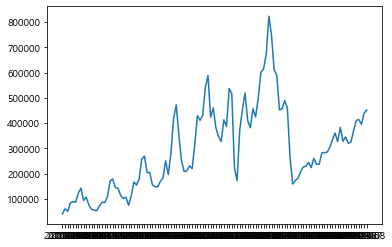

In [76]:
plt.plot(df_filter['기준년월'], df_filter['관광']) # plot(x값, y값)
plt.show() # 그래프 출력

In [77]:
# x값 보기 좋게 바꾸기

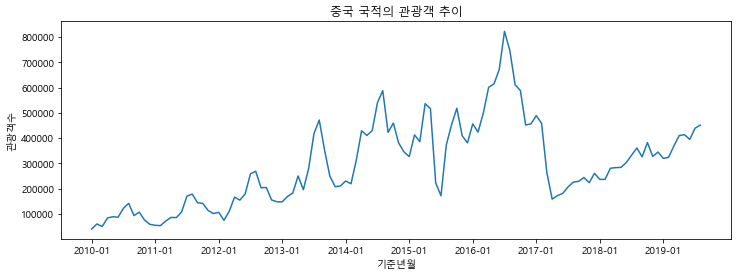

In [78]:
## 그래프 크기 조절
plt.figure(figsize = (12, 4))

# 그래프 내용 설정
plt.plot(df_filter['기준년월'], df_filter['관광'])

# 그래프 타이틀, x축, y축 이름 달기
plt.title('중국 국적의 관광객 추이')
plt.xlabel('기준년월')
plt.ylabel('관광객수')

# x 축 눈금 값 설정
plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01','2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01'])

# 그래프 표현
plt.show()

### 반복문으로 여러나라 그래프 그리기

In [80]:
country_list = ['중국', '일본', '대만', '미국', '홍콩']

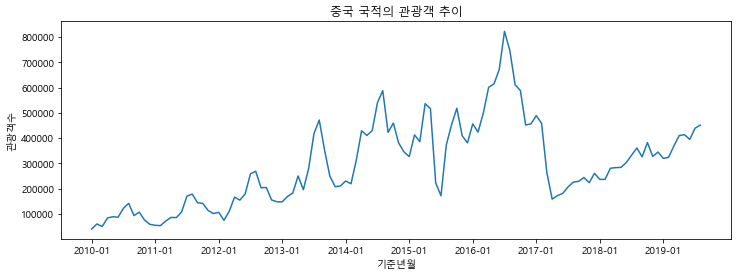

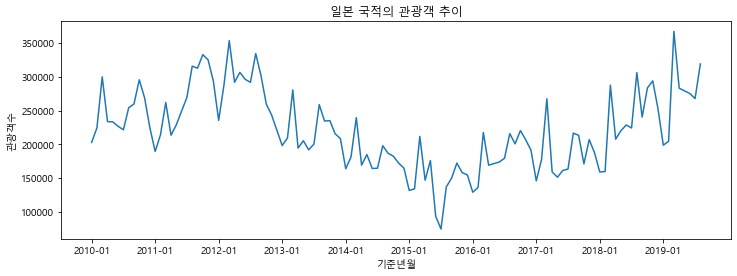

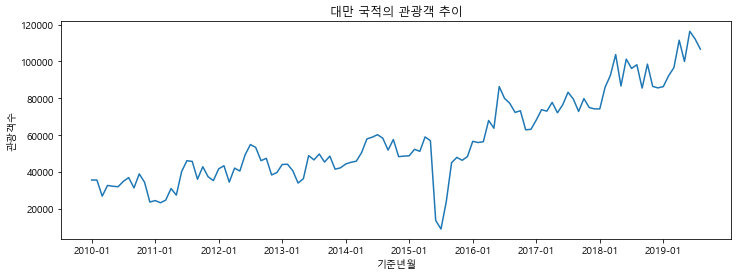

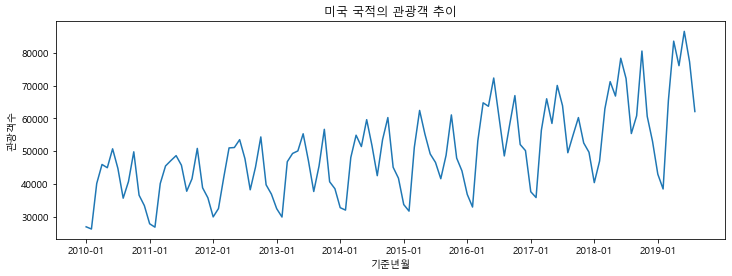

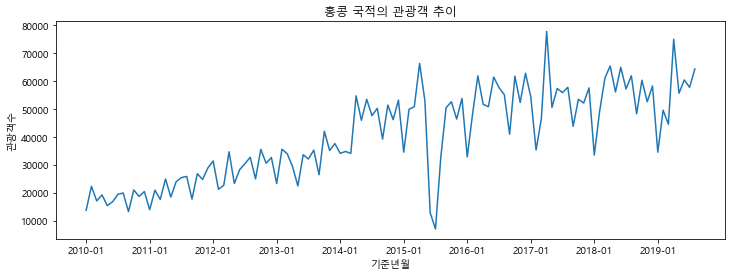

In [81]:
for country in country_list:
    condition = df['국적'] == country
    df_filter = df[condition]
    
    plt.figure(figsize = (12, 4))
    
    plt.plot(df_filter['기준년월'], df_filter['관광'])

    plt.title('{} 국적의 관광객 추이'.format(country))
    plt.xlabel('기준년월')
    plt.ylabel('관광객수')
    
    plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01','2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01'])
    
    plt.show()

## 3.3.3 히트맵 그래프 그리기
- matrix 형태에 포함된 각 값을 컬러로 표현하는 시각화 방법

In [82]:
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


In [102]:
df['년도'] = df['기준년월'].str[0:4]
df['월'] = df['기준년월'].str[5:]

In [103]:
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6,2010,01
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9,2010,01
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5,2010,01
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1,2010,01
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3,2010,01


In [104]:
condition = df['국적'] == '중국'
df_filter = df[condition]
df_filter.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1,2010,01
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6,2010,02
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2,2010,03
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5,2010,04
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0,2010,05


### * pivot_table을 이용하여 히트맵으로 표현하고자 하는 형태로 만든다.

In [106]:
df_pivot = df_filter.pivot_table(values = '관광',
                          index = '년도',
                          columns = '월')

df_pivot

월,01,02,03,04,05,06,07,08,09,10,11,12
년도,,,,,,,,,,,,
2010,40425.0,60590.0,50330.0,84252.0,89056.0,87080.0,122432.0,142180.0,93545.0,107237.0,75686.0,58987.0
2011,55070.0,53863.0,72003.0,86397.0,85668.0,108060.0,170524.0,178937.0,144704.0,141824.0,113856.0,101605.0
2012,106606.0,74895.0,110965.0,166843.0,154841.0,179074.0,258907.0,268988.0,203857.0,204866.0,155503.0,148320.0
2013,148118.0,169395.0,182850.0,250549.0,196306.0,280319.0,417991.0,472005.0,353359.0,249850.0,208175.0,210950.0
2014,230706.0,219533.0,313400.0,429419.0,410971.0,429991.0,540683.0,588181.0,423133.0,459708.0,381118.0,345957.0
2015,327225.0,413096.0,386386.0,536428.0,517154.0,223101.0,172075.0,372990.0,453670.0,518651.0,409635.0,381722.0
2016,456636.0,424232.0,500018.0,601460.0,614636.0,671493.0,823016.0,747818.0,611538.0,588561.0,452082.0,456882.0
2017,489256.0,458952.0,263788.0,158784.0,172527.0,181507.0,207099.0,226153.0,229172.0,244541.0,223743.0,260983.0
2018,236825.0,237075.0,281020.0,283533.0,284317.0,303405.0,332657.0,360982.0,326438.0,382922.0,327664.0,345135.0


* 히트맵 그래프는 matplotlib에서 지원하지 않고 seaborn에서 지원한다.
* seaborn은 matplotlib에 종속되기 때문에 임포트를 위해 항상 함께 임포트해야 한다.

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

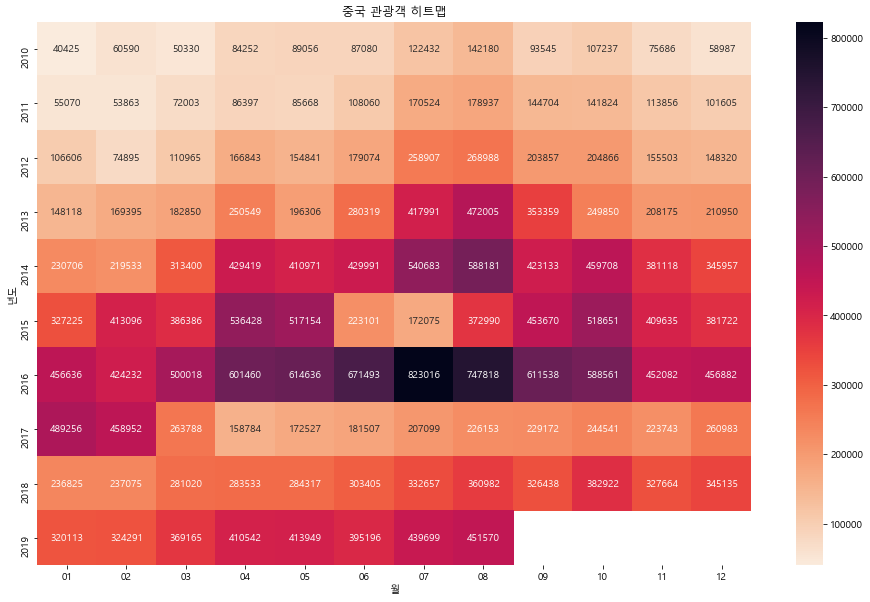

In [113]:
# 그래프 크기
plt.figure(figsize = (16, 10))

# 히트맵 그리기
# annot: 그래프에 각 칸에 실제 값 표시
# fmt: 숫자 형태를 소수점이 없는 실수형으로 표현
# cmap: 그래프의 색깔 조합
sns.heatmap(df_pivot, annot=True, fmt='.0f', cmap='rocket_r')

# 그래프 타이틀 달기
plt.title('중국 관광객 히트맵')

plt.show()

### * 반복문으로 상위 5개국 히트맵 그리기

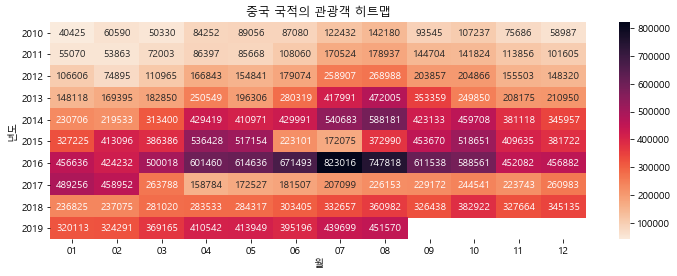

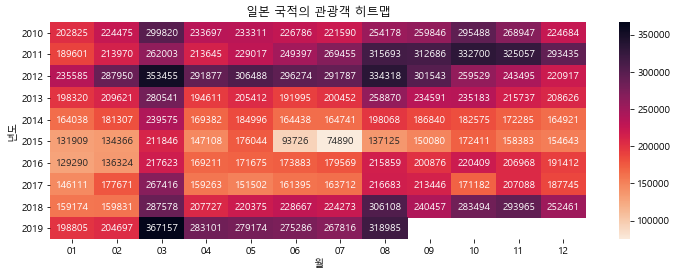

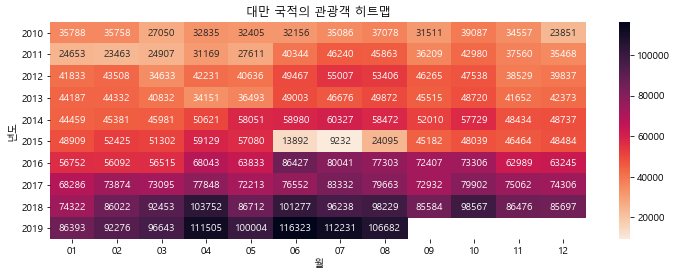

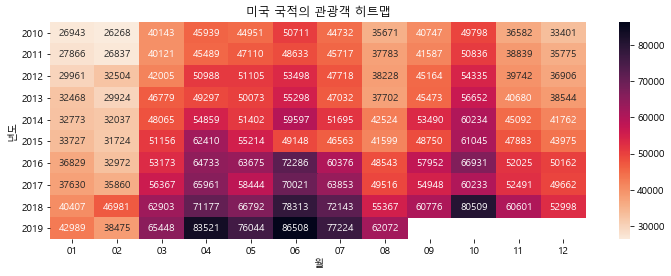

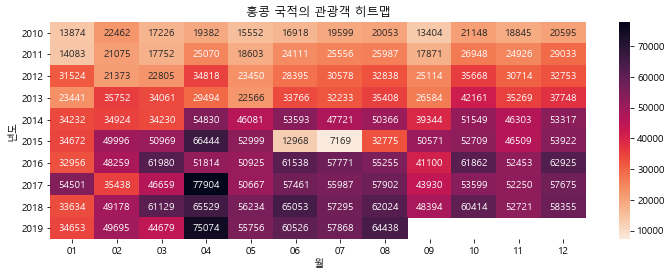

In [114]:
for country in country_list:
    condition = df['국적'] == country
    df_filter = df[condition]
    
    df_pivot = df_filter.pivot_table(values = '관광',
                          index = '년도',
                          columns = '월')
    
    plt.figure(figsize = (12, 4))
    
    sns.heatmap(df_pivot, annot=True, fmt='.0f', cmap='rocket_r')


    plt.title('{} 국적의 관광객 히트맵'.format(country))
    
    plt.show()